# Make custom Dataset

In [1]:
import numpy as np
import pandas as pd
import mediapipe as mp
import os
import cv2

In [59]:
numbers = '123456789'
label = list(numbers)
label.append('10')
label

cap = cv2.VideoCapture(0)
import datetime;
cnt = 0

while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break
    
    # Flip the image horizontally for a selfie-view display.

    image = cv2.flip(image,1)

    pressedKey = cv2.waitKey(1) & 0xFF
    pressedKey = chr(pressedKey)
    if pressedKey == 'q':  # Break pressing q
        break
    if pressedKey in [str(k) for k in range(10)]:
        cnt += 1
        cur_time = datetime.datetime.now().strftime("%H-%M-%S.%f")
        file_path = f'./Dataset_custom2/{pressedKey}/{cur_time}.jpg'

        cv2.imwrite(file_path, image)
        cv2.putText(image,f'count: {cnt}',(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
    
    cv2.imshow('image', image)
        
cap.release()
cv2.destroyAllWindows()

In [60]:
#Count number of data
datanum = []
for n in range(10):
    print(f'{n}: ',len(os.listdir(f'./Dataset_custom2/{n}')))


0:  675
1:  369
2:  481
3:  0
4:  0
5:  0
6:  0
7:  165
8:  972
9:  1028


# Save Dataset

In [61]:
import numpy as np
import pandas as pd
import mediapipe as mp
import os
import cv2
import tensorflow as tf

In [62]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [63]:
numbers = list("1234567890")
print(numbers)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']


In [65]:
# Apply Mediapipe Hand pose estimation to image files

temp_dataset = []
dataset_dirs = ['Dataset_custom2/', 'Dataset_custom/']

for dataset_directory_prefix in dataset_dirs:
    print(dataset_directory_prefix)
    for label in numbers:
        not_detected = 0
        detected = 0

        for dirname, _, filenames in os.walk(dataset_directory_prefix + label):
            for filename in filenames:
                pathname = os.path.join(dirname, filename)

                with mp_hands.Hands(
                    static_image_mode=True,
                    max_num_hands=2,
                    min_detection_confidence=0.3
                ) as hands:

                    image = cv2.flip(cv2.imread(pathname), 1)
                    result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

                    landmark_vertices_xyz = []
                    if not result.multi_hand_landmarks:
                        not_detected += 1
                    
                    else:
                        detected += 1
                        for l in result.multi_hand_landmarks[0].landmark:
                            landmark_vertices_xyz.append(l.x)
                            landmark_vertices_xyz.append(l.y)
                            landmark_vertices_xyz.append(l.z)
                        temp_dataset.append((*landmark_vertices_xyz, label))
                    
                    
        print(f'imported: {label}')
        print(f'detected: {detected}, not detected: {not_detected}')
        
landmark_vertices_xyz_label = []
for idx in range(21):
    for char in list('xyz'):
        vertex_label = char+str(idx)
        landmark_vertices_xyz_label.append(vertex_label)
            
print(*landmark_vertices_xyz_label)
        
dataset = pd.DataFrame(temp_dataset, columns=[*landmark_vertices_xyz_label, 'target'])
dataset.head()

Dataset_custom2/
imported: 1
detected: 369, not detected: 0
imported: 2
detected: 481, not detected: 0
imported: 3
detected: 0, not detected: 0
imported: 4
detected: 0, not detected: 0
imported: 5
detected: 0, not detected: 0
imported: 6
detected: 0, not detected: 0
imported: 7
detected: 165, not detected: 0
imported: 8
detected: 972, not detected: 0
imported: 9
detected: 1028, not detected: 0
imported: 0
detected: 675, not detected: 0
x0 y0 z0 x1 y1 z1 x2 y2 z2 x3 y3 z3 x4 y4 z4 x5 y5 z5 x6 y6 z6 x7 y7 z7 x8 y8 z8 x9 y9 z9 x10 y10 z10 x11 y11 z11 x12 y12 z12 x13 y13 z13 x14 y14 z14 x15 y15 z15 x16 y16 z16 x17 y17 z17 x18 y18 z18 x19 y19 z19 x20 y20 z20


,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,target
0,0.747116,0.652656,-1.936004e-07,0.719913,0.620880,-0.012038,0.706376,0.567618,-0.017131,0.717739,...,0.784970,0.519423,-0.027596,0.774247,0.546122,-0.023007,0.768885,0.570250,-0.014788,1
1,0.734429,0.686508,-1.734448e-07,0.704938,0.656736,-0.010910,0.688885,0.610384,-0.016488,0.698317,...,0.766713,0.541239,-0.028225,0.756082,0.564267,-0.023639,0.749948,0.589654,-0.016043,1
2,0.735084,0.688880,-1.855674e-07,0.704653,0.661444,-0.011950,0.686781,0.615218,-0.017654,0.694421,...,0.764598,0.544319,-0.028047,0.753123,0.567515,-0.024109,0.746896,0.592887,-0.016710,1
3,0.734496,0.691924,-1.879051e-07,0.703068,0.664546,-0.010941,0.684539,0.617966,-0.016534,0.692815,...,0.763901,0.547003,-0.031670,0.752400,0.569656,-0.027629,0.745824,0.593994,-0.020438,1
4,0.732295,0.694120,-2.104991e-07,0.701798,0.667234,-0.011661,0.681210,0.622148,-0.018300,0.687228,...,0.760552,0.548132,-0.033708,0.749261,0.573863,-0.028538,0.744102,0.598300,-0.020780,1


In [66]:
dataset.to_csv('data_custom3.csv', index=False)
dataset['target'].value_counts()

9    1028
8     972
0     675
2     481
1     369
7     165
Name: target, dtype: int64

In [67]:
# Apply Mediapipe Hand pose estimation to image files

temp_dataset = []
dataset_dirs = ['Dataset_custom/', 'Dataset_custom2/']

for dataset_directory_prefix in dataset_dirs:
    print(dataset_directory_prefix)
    for label in numbers:
        not_detected = 0
        detected = 0

        for dirname, _, filenames in os.walk(dataset_directory_prefix + label):
            for filename in filenames:
                pathname = os.path.join(dirname, filename)

                with mp_hands.Hands(
                    static_image_mode=True,
                    max_num_hands=2,
                    min_detection_confidence=0.3
                ) as hands:

                    result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

                    landmark_vertices_xyz = []
                    if not result.multi_hand_landmarks:
                        not_detected += 1
                    
                    else:
                        detected += 1
                        for l in result.multi_hand_landmarks[0].landmark:
                            landmark_vertices_xyz.append(l.x)
                            landmark_vertices_xyz.append(l.y)
                            landmark_vertices_xyz.append(l.z)
                        temp_dataset.append((*landmark_vertices_xyz, label))
                    
                    
        print(f'imported: {label}')
        print(f'detected: {detected}, not detected: {not_detected}')
        
landmark_vertices_xyz_label = []
for idx in range(21):
    for char in list('xyz'):
        vertex_label = char+str(idx)
        landmark_vertices_xyz_label.append(vertex_label)
            
print(*landmark_vertices_xyz_label)
        
dataset = pd.DataFrame(temp_dataset, columns=[*landmark_vertices_xyz_label, 'target'])
dataset.head()

Dataset_custom/
imported: 1
detected: 1024, not detected: 0
imported: 2
detected: 1173, not detected: 0
imported: 3
detected: 959, not detected: 0
imported: 4
detected: 1109, not detected: 0
imported: 5
detected: 1079, not detected: 0
imported: 6
detected: 1265, not detected: 0
imported: 7
detected: 1183, not detected: 0
imported: 8
detected: 1209, not detected: 0
imported: 9
detected: 1264, not detected: 0
imported: 0
detected: 1314, not detected: 0
Dataset_custom2/
imported: 1
detected: 369, not detected: 0
imported: 2
detected: 481, not detected: 0
imported: 3
detected: 0, not detected: 0
imported: 4
detected: 0, not detected: 0
imported: 5
detected: 0, not detected: 0
imported: 6
detected: 0, not detected: 0
imported: 7
detected: 165, not detected: 0
imported: 8
detected: 972, not detected: 0
imported: 9
detected: 1028, not detected: 0
imported: 0
detected: 675, not detected: 0
x0 y0 z0 x1 y1 z1 x2 y2 z2 x3 y3 z3 x4 y4 z4 x5 y5 z5 x6 y6 z6 x7 y7 z7 x8 y8 z8 x9 y9 z9 x10 y10 z10 x11

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,target
0,0.711374,0.680027,-4.126369e-07,0.699605,0.629168,-0.014072,0.710164,0.573795,-0.019677,0.720225,...,0.771825,0.673946,-0.021006,0.755647,0.675842,-0.018996,0.755509,0.673709,-0.016143,1
1,0.711374,0.680027,-4.126369e-07,0.699605,0.629168,-0.014072,0.710164,0.573795,-0.019677,0.720225,...,0.771825,0.673946,-0.021006,0.755647,0.675842,-0.018996,0.755509,0.673709,-0.016143,1
2,0.711374,0.680027,-4.126369e-07,0.699605,0.629168,-0.014072,0.710164,0.573795,-0.019677,0.720225,...,0.771825,0.673946,-0.021006,0.755647,0.675842,-0.018996,0.755509,0.673709,-0.016143,1
3,0.711374,0.680027,-4.126369e-07,0.699605,0.629168,-0.014072,0.710164,0.573795,-0.019677,0.720225,...,0.771825,0.673946,-0.021006,0.755647,0.675842,-0.018996,0.755509,0.673709,-0.016143,1
4,0.711374,0.680027,-4.126369e-07,0.699605,0.629168,-0.014072,0.710164,0.573795,-0.019677,0.720225,...,0.771825,0.673946,-0.021006,0.755647,0.675842,-0.018996,0.755509,0.673709,-0.016143,1


In [68]:
dataset.to_csv('data_custom_flipped.csv', index=False)
dataset['target'].value_counts()

9    2292
8    2181
0    1989
2    1654
1    1393
7    1348
6    1265
4    1109
5    1079
3     959
Name: target, dtype: int64

# Evaluate Model with custom dataset

In [38]:
X_custom = dataset.drop(['target'],axis=1).values
y_custom = dataset['target'].values
y_custom_encoded = pd.get_dummies(y_custom, prefix='target')

In [39]:
model = tf.keras.models.load_model('backup/asl_3.h5')

In [40]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, numbers)

c:\Users\jinu7\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


79/79 [==============================] - 0s 2ms/step - loss: 1.3122 - accuracy: 0.6429
accuracy:  0.6429423689842224


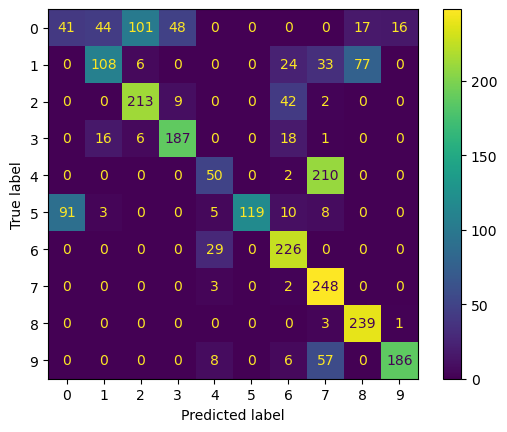

In [41]:
from sklearn.metrics import plot_confusion_matrix

y_test_int = [int(y) for y in y_custom]
plot_confusion_matrix(estimator=classifier, X=X_custom, y_true=y_test_int)

acc = model.evaluate(X_custom, y_custom_encoded)[1]
print("accuracy: ",acc)